### Data Analysis and Visualizations

In [3]:
import matplotlib as plt
import pandas as pd

# Load DataFrame from the previous notebook
df = pd.read_pickle('../data/processed_df.pkl')
print("✅ DataFrame loaded successfully!")
print(f"Shape: {df.shape}")

✅ DataFrame loaded successfully!
Shape: (541909, 8)


In [4]:
# Monthly sales trend
monthly_sales = df_clean.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalAmount'])
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

NameError: name 'df_clean' is not defined

In [ ]:
# Customer purchase behavior
customer_stats = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of orders
    'TotalAmount': ['sum', 'mean'],  # Total and average spending
    'Quantity': 'sum'  # Total items bought
}).round(2)

customer_stats.columns = ['Orders', 'Total_Spent', 'Avg_Order_Value', 'Total_Items']
customer_stats = customer_stats.reset_index()

# Top 10 customers
top_customers = customer_stats.nlargest(10, 'Total_Spent')
print("Top 10 Customers by Total Spending:")
print(top_customers)

Top 10 Customers by Total Spending:
      CustomerID  Orders  Total_Spent  Avg_Order_Value  Total_Items
1825     14911.0     192     89497.40            17.57        58711
1247     14096.0      17     42520.92             8.59        13908
3887     17841.0     124     36302.98             4.65        21959
544      13089.0      81     29380.59            19.75        19500
1390     14298.0      41     28086.59            21.13        40711
322      12748.0     201     24530.62             5.44        19809
540      13081.0      10     16002.28            18.33        14406
1908     15039.0      46     14468.74            10.02         7028
1290     14156.0      39     14052.28            16.36         8795
2107     15311.0      91     13327.98             6.78         8280


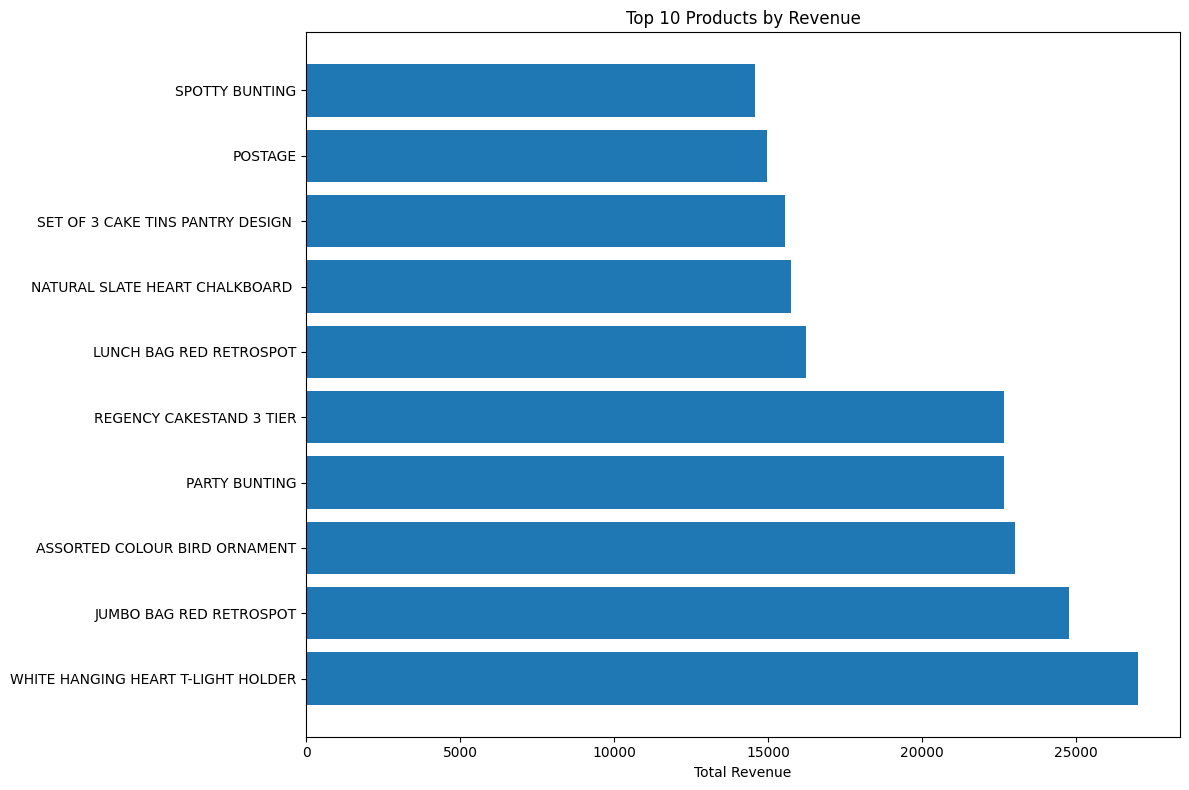

In [ ]:
# Top selling products
product_sales = df_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).sort_values('TotalAmount', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(product_sales.index, product_sales['TotalAmount'])
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()

### Output

In [ ]:
plt.savefig('visualizations/monthly_sales_trend.png', dpi=300, bbox_inches='tight')